In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## let's read json file

In [2]:
import json

with open('logins.json') as json_file:
    logins = json.load(json_file)

In [3]:
logins.keys()

dict_keys(['login_time'])

In [4]:
df=pd.DataFrame(logins)

In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df['login_time']=pd.to_datetime(df['login_time'])
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
df.set_index('login_time', inplace=True)
df['agg_count']=1
df.sort_index(inplace=True)
df= df.resample("15min").sum()
df

,agg_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [8]:
df.shape

(9788, 1)

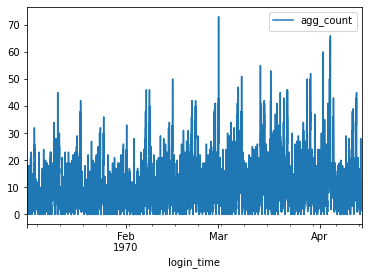

In [9]:
_= df.plot()

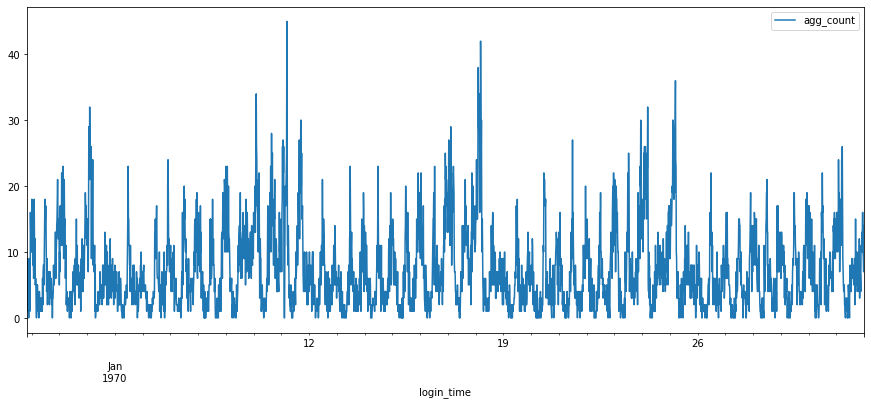

In [10]:
_= df.loc['1970-01'].plot(figsize=(15,6))

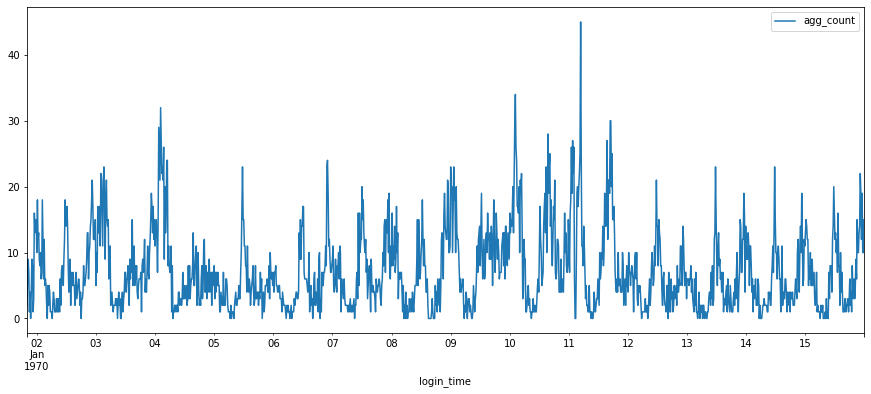

In [11]:
_= df.loc['1970-01-01':'1970-01-15'].plot(figsize=(15,6))

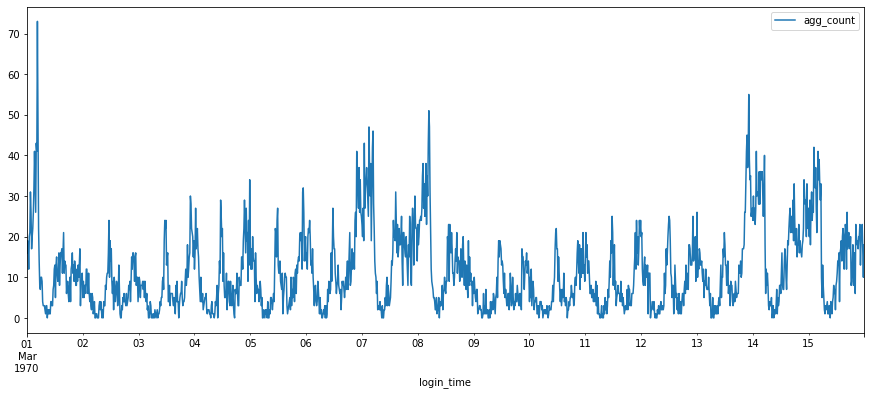

In [12]:
_= df.loc['1970-03-01':'1970-03-15'].plot(figsize=(15,6))

In [13]:
import datetime
datetime.datetime.strptime('02 03 1970', '%d %m %Y').weekday()

0

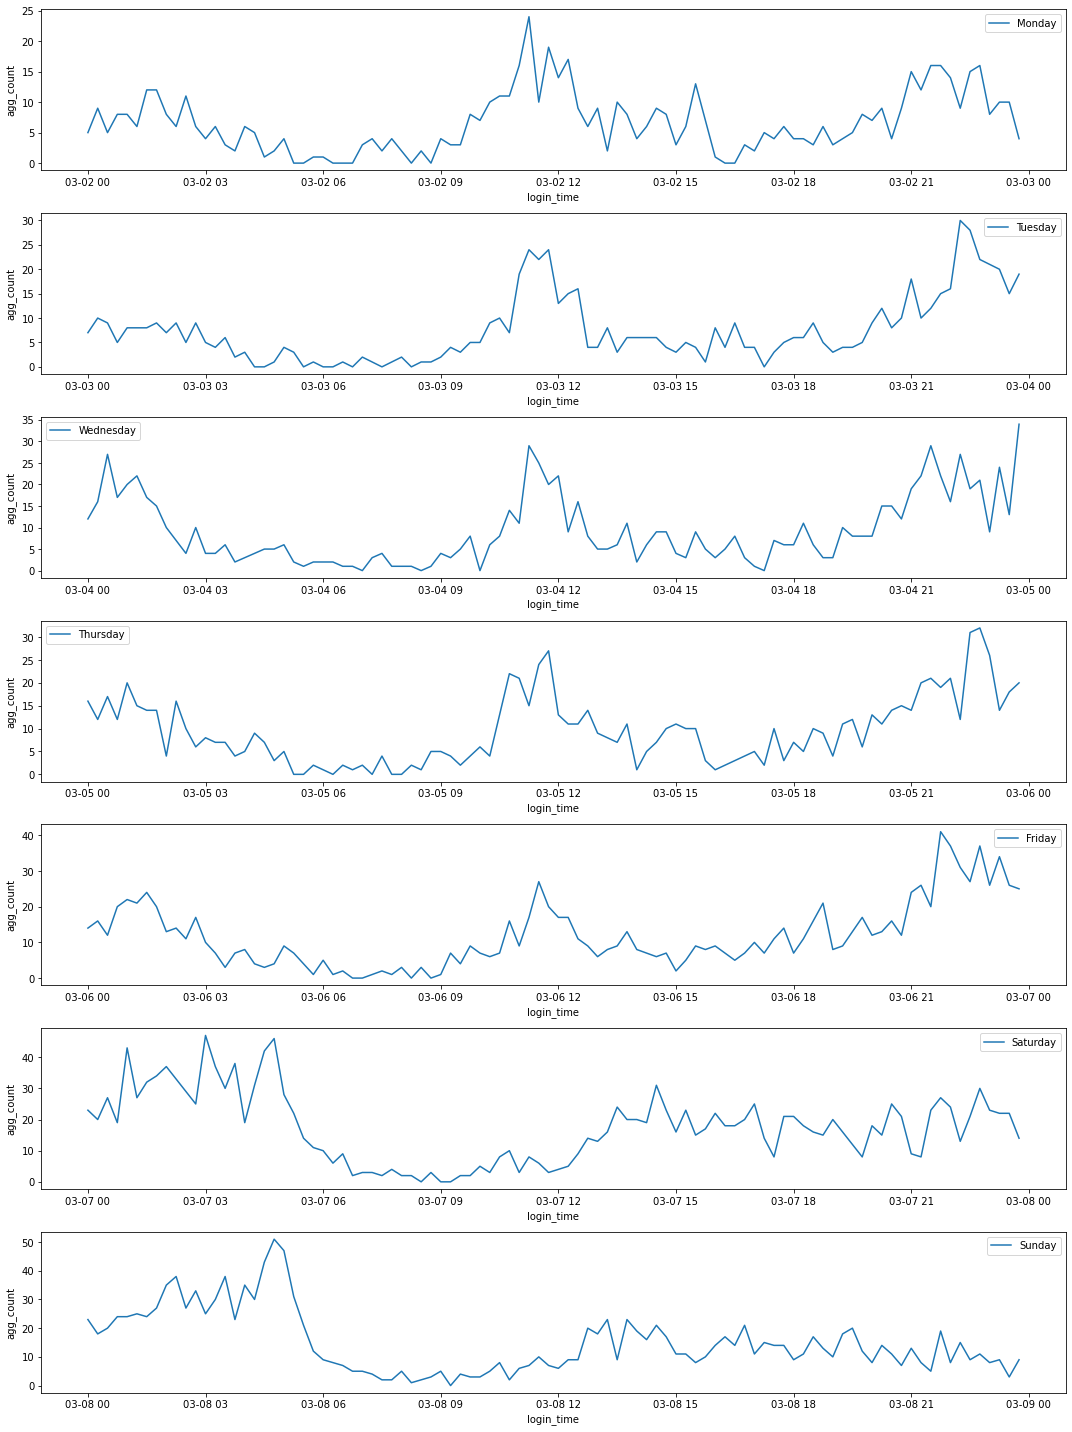

In [14]:

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) =plt.subplots(nrows=7,ncols=1,figsize=(15,20))
sns.lineplot(x=df.loc['1970-03-02'].index,y='agg_count', data=df.loc['1970-03-02'], label='Monday', ax=ax1)
sns.lineplot(x=df.loc['1970-03-03'].index,y='agg_count', data=df.loc['1970-03-03'], label='Tuesday', ax=ax2)
sns.lineplot(x=df.loc['1970-03-04'].index,y='agg_count', data=df.loc['1970-03-04'], label='Wednesday', ax=ax3)
sns.lineplot(x=df.loc['1970-03-05'].index,y='agg_count', data=df.loc['1970-03-05'], label='Thursday', ax=ax4)
sns.lineplot(x=df.loc['1970-03-06'].index,y='agg_count', data=df.loc['1970-03-06'], label='Friday', ax=ax5)
sns.lineplot(x=df.loc['1970-03-07'].index,y='agg_count', data=df.loc['1970-03-07'], label='Saturday', ax=ax6)
sns.lineplot(x=df.loc['1970-03-08'].index,y='agg_count', data=df.loc['1970-03-08'], label='Sunday', ax=ax7)

fig.tight_layout()

In [15]:
import datetime
datetime.datetime.strptime('05 01 1970', '%d %m %Y').weekday()

0

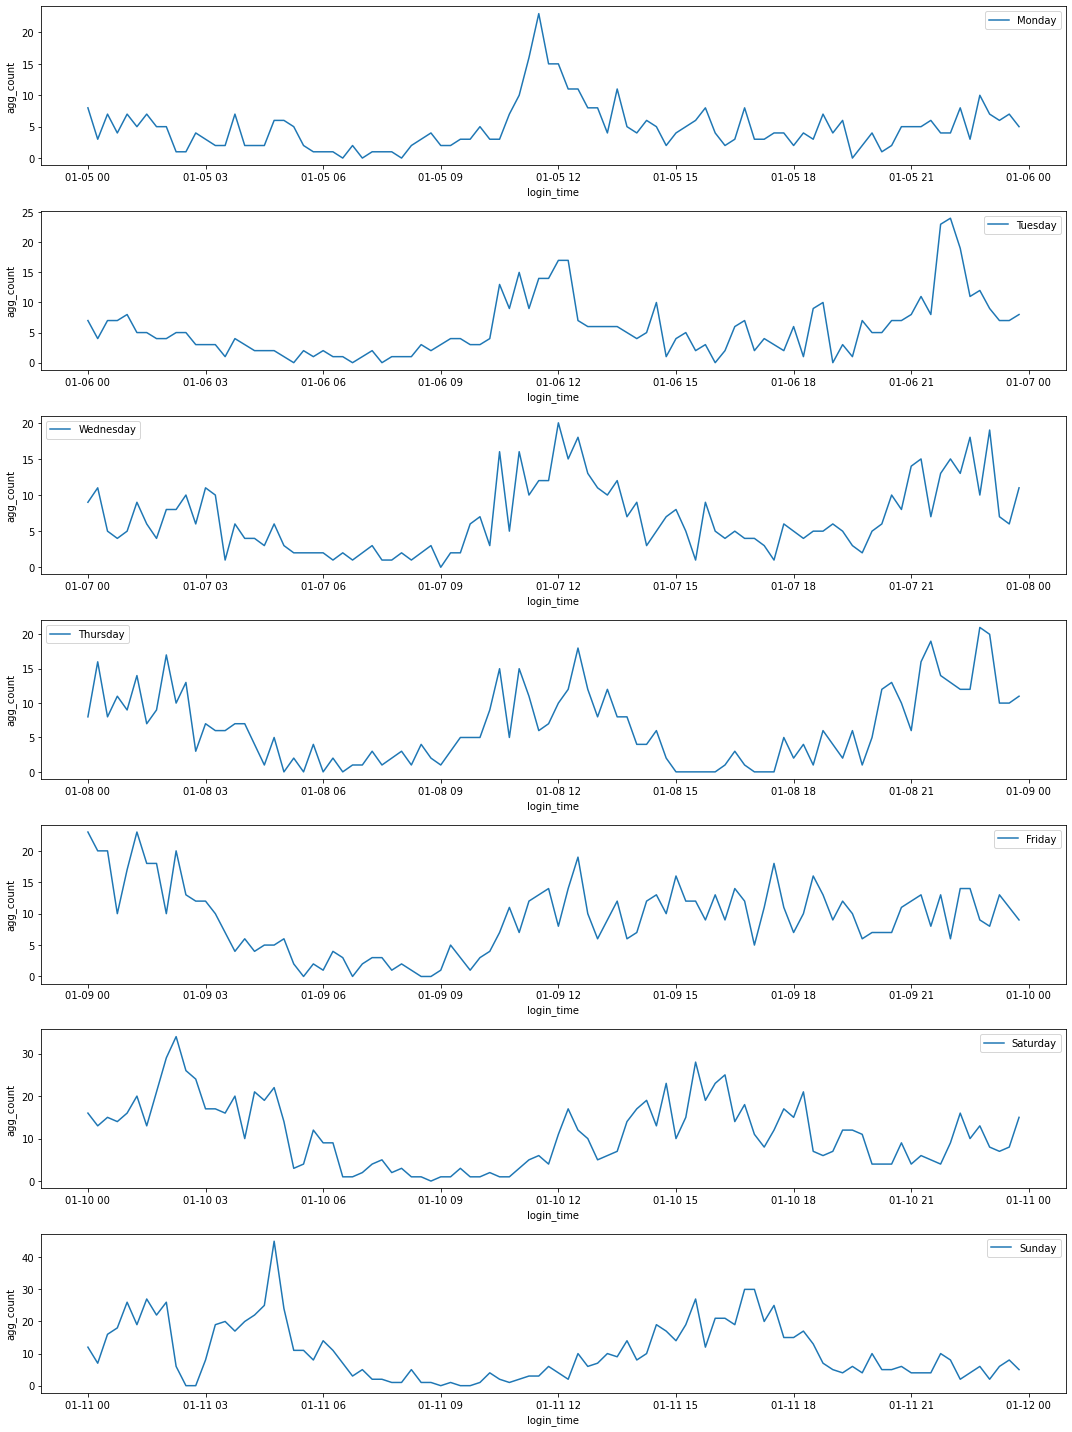

In [16]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) =plt.subplots(nrows=7,ncols=1,figsize=(15,20))
sns.lineplot(x=df.loc['1970-01-05'].index,y='agg_count', data=df.loc['1970-01-05'], label='Monday', ax=ax1)
sns.lineplot(x=df.loc['1970-01-06'].index,y='agg_count', data=df.loc['1970-01-06'], label='Tuesday', ax=ax2)
sns.lineplot(x=df.loc['1970-01-07'].index,y='agg_count', data=df.loc['1970-01-07'], label='Wednesday', ax=ax3)
sns.lineplot(x=df.loc['1970-01-08'].index,y='agg_count', data=df.loc['1970-01-08'], label='Thursday', ax=ax4)
sns.lineplot(x=df.loc['1970-01-09'].index,y='agg_count', data=df.loc['1970-01-09'], label='Friday', ax=ax5)
sns.lineplot(x=df.loc['1970-01-10'].index,y='agg_count', data=df.loc['1970-01-10'], label='Saturday', ax=ax6)
sns.lineplot(x=df.loc['1970-01-11'].index,y='agg_count', data=df.loc['1970-01-11'], label='Sunday', ax=ax7)

fig.tight_layout()

From above analysis, it is seen that logins are higher in weekends than in weekdays. During weekdays, logins get maximum around noon and 9 pm. Weekend logins peak are observed during 2-5 am and around 3 pm. Monday shows the mimimum logins compared to the other weekdays logins

## Part-2: Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Ans: From the above problem of the statement, it is seen that the measure of success metric should be to check whether the company's revenue is increased or not? And another should be to check if there is an increment in driver's availability in both cities or not?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

The first step is to check whether reimbursing the toll increases the drivers crossing the city or not? This can be done by counting the vehicles at the crossing bridge (installing sensors in the crossing bridge or in the vehicles).  Another step is to check the total revenue after and before the implementation of the new strategy.

b. what statistical test(s) you will conduct to verify the significance of the
observation

This can be done by using ANOVA hypothesis testing. The null hypothesis would be there are no significant differences between driver crossing the bridge and total revenue before and after the implementation of the new strategy. 

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

The result can be interpreted by plotting some figures that show changes in the percentage of drivers who cross the bridge from both cities. If no significant changes are observed, then we might have to think of an alternative solution that encourages drivers to cross the bridge. 




## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
import json
with open('ultimate_data_challenge.json') as json_file:
    ultimate_data = json.load(json_file)
df=pd.DataFrame(ultimate_data)

In [19]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

In [22]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [23]:
df['last_trip_date'].describe(datetime_is_numeric=True)

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [24]:
Days=df['last_trip_date'].max()-df['last_trip_date']
df['days_since_last_trip']=(Days/ np.timedelta64(1, 'D')).astype(int)
df['days_since_last_trip']

0         14
1         57
2        175
3          2
4        108
        ... 
49995     26
49996    157
49997     40
49998    167
49999     72
Name: days_since_last_trip, Length: 50000, dtype: int32

In [25]:
df['signup_date']=pd.to_datetime(df['signup_date'])
Days=df['last_trip_date'].max()-df['signup_date']
df['days_since_signup']=(Days/ np.timedelta64(1, 'D')).astype(int)
df['days_since_signup']

0        157
1        153
2        176
3        172
4        155
        ... 
49995    157
49996    158
49997    151
49998    168
49999    164
Name: days_since_signup, Length: 50000, dtype: int32

In [26]:

df['retained']=['yes' if df['days_since_last_trip'][i]<=30 else 'no' for i in range(len(df)) ]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,157,yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,153,no
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,176,no
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,172,yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,155,no


C:\Users\abiad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


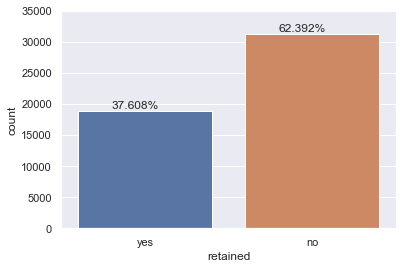

In [27]:
sns.set()
ax=sns.countplot(df['retained'])
plt.ylim([0,35000])
for p in ax.patches:
        ax.annotate('{}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.2, p.get_height()+500))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  days_since_last_trip    50000 non-null  int32 

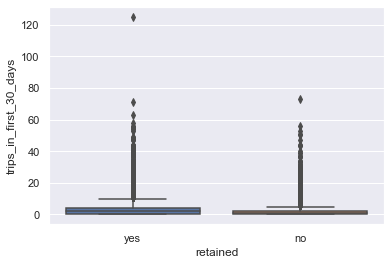

In [29]:
_= sns.boxplot(data=df, y='trips_in_first_30_days', x='retained')

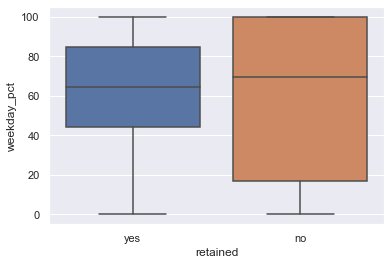

In [30]:
_= sns.boxplot(data=df, y='weekday_pct', x='retained')

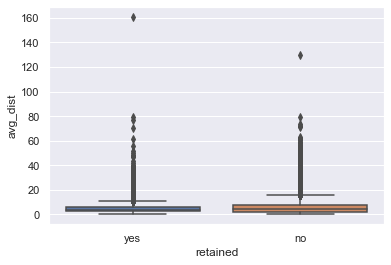

In [31]:
_= sns.boxplot(data=df, x='retained', y='avg_dist')

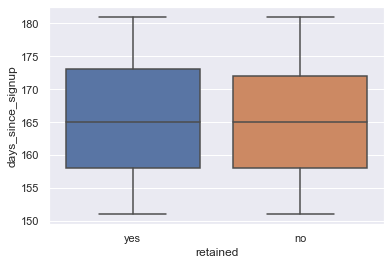

In [32]:
_= sns.boxplot(data=df, x='retained', y='days_since_signup')

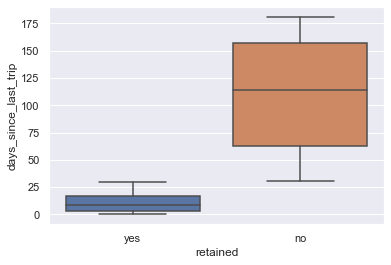

In [33]:
_= sns.boxplot(data=df, x='retained', y='days_since_last_trip')

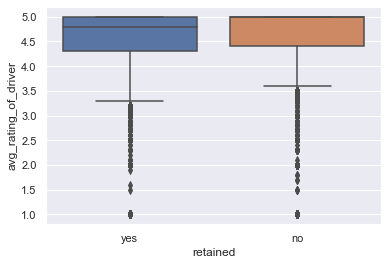

In [34]:
_= sns.boxplot(data=df, x='retained', y='avg_rating_of_driver')

In [35]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

<AxesSubplot:>

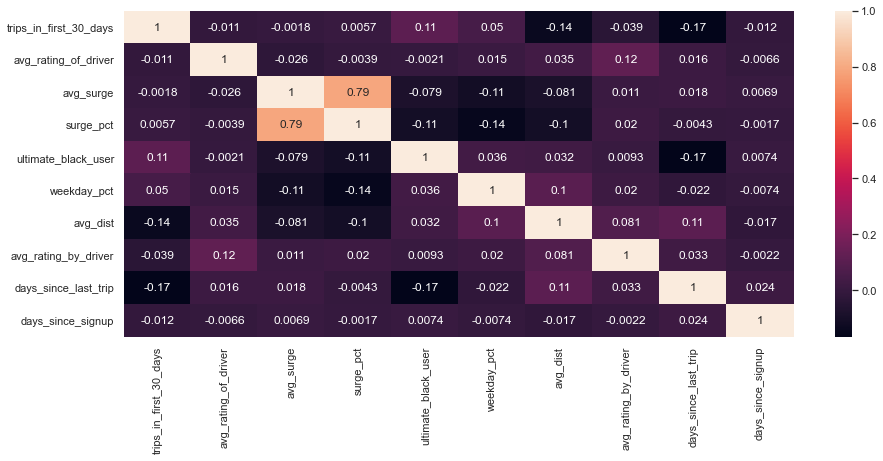

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [37]:
df.isnull().sum()*100./len(df)

city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
days_since_last_trip       0.000
days_since_signup          0.000
retained                   0.000
dtype: float64

In [38]:
## Handeling Missing Values
df['phone']=df['phone'].fillna(value='Other')
df['avg_rating_of_driver']=df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df['avg_rating_by_driver']=df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df.isnull().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
days_since_last_trip      False
days_since_signup         False
retained                  False
dtype: bool

In [39]:
df=df.drop(['signup_date','last_trip_date'],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
df['ultimate_black_user']= le.fit_transform(df['ultimate_black_user'])
df['retained']= le.fit_transform(df['retained'])
df[['ultimate_black_user','retained']]

,ultimate_black_user,retained
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
49995,0,1
49996,0,0
49997,1,0
49998,0,0


In [41]:
cat=['city', 'phone']

In [42]:
dummies=pd.get_dummies(df[cat],drop_first=True)
df=pd.concat([df,dummies], axis=1)
df=df.drop(cat, axis=1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,retained,city_King's Landing,city_Winterfell,phone_Other,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,14,157,1,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,57,153,0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,175,176,0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,2,172,1,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,108,155,0,0,1,0,0


## Modelling

In [48]:
### Test train split and scaling
X=df.drop(['retained', 'days_since_last_trip'], axis=1).values
y=df['retained'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Let's try several classification algorithm and chose best one and then tune the hyper-parameter

### Logistic Regression

Test Data Metrics:
[[5292  960]
 [1871 1877]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6252
           1       0.66      0.50      0.57      3748

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



Train Data Metrics:
[[21269  3675]
 [ 7626  7430]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     24944
           1       0.67      0.49      0.57     15056

    accuracy                           0.72     40000
   macro avg       0.70      0.67      0.68     40000
weighted avg       0.71      0.72      0.71     40000



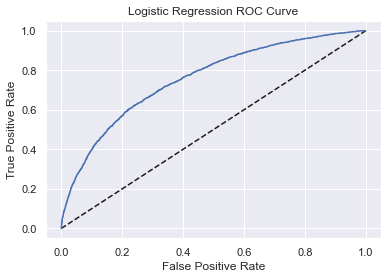

ROC_AUC Score
roc_auc (test): 0.757
roc_auc (training): 0.761


In [49]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
    
print('ROC_AUC Score')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

## L1 Regularization

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train= classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[5294  958]
 [1865 1883]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6252
           1       0.66      0.50      0.57      3748

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



Train Data Metrics:
[[21287  3657]
 [ 7606  7450]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     24944
           1       0.67      0.49      0.57     15056

    accuracy                           0.72     40000
   macro avg       0.70      0.67      0.68     40000
weighted avg       0.71      0.72      0.71     40000

roc_auc (training): 0.762
roc_auc (test): 0.758


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(random_state = 0)
classifier_DT.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
y_pred_train=classifier_DT.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_DT.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[4802 1450]
 [1507 2241]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      6252
           1       0.61      0.60      0.60      3748

    accuracy                           0.70     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.70      0.70      0.70     10000



Train Data Metrics:
[[24944     0]
 [    4 15052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       1.00      1.00      1.00     15056

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

roc_auc (training): 1.000
roc_auc (test): 0.683


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[5258  994]
 [1317 2431]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      6252
           1       0.71      0.65      0.68      3748

    accuracy                           0.77     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.77      0.77      0.77     10000



Train Data Metrics:
[[24944     0]
 [    4 15052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       1.00      1.00      1.00     15056

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

roc_auc (training): 1.000
roc_auc (test): 0.834


## XgBoost

In [53]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train = classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

C:\Users\abiad\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:33] WARNING: ..\src\learner.cc:573: 
Parameters: { "random_stat" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:06:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Data Metrics:
[[5353  899]
 [1226 2522]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6252
           1       0.74      0.67      0.70      3748

    accuracy                           0.79     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.79      0.79      0.79     10000



Train Data Metrics:
[[22589  2355]
 [ 39

## Gradient Boosting

In [54]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15056, number of negative: 24944
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376400 -> initscore=-0.504857
[LightGBM] [Info] Start training from score -0.504857
Test Data Metrics:
[[5391  861]
 [1315 2433]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6252
           1       0.74  

In [55]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['retained','days_since_last_trip'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
5,weekday_pct,100.000000
0,trips_in_first_30_days,79.007634
9,city_King's Landing,67.175573
4,ultimate_black_user,53.435115
6,avg_dist,52.671756
3,surge_pct,47.328244
12,phone_iPhone,46.183206
10,city_Winterfell,32.824427
7,avg_rating_by_driver,30.152672
1,avg_rating_of_driver,24.618321


## Hyperparameter tuning

In [57]:
# Randomized CV
'''
param_grid = {
    'n_estimators':list(np.arange(150,200,10)),
   'colsample_bytree': list(np.linspace(0,2,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[1,1.5,2,2.5],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}
'''

param_grid = {
    'n_estimators':list(np.arange(150,200,10)),
      'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5]}

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=1000,
    scoring='roc_auc',
    cv=10,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
0.8603479746077513
{'reg_alpha': 2.5, 'num_leaves': 25, 'n_estimators': 190, 'min_split_gain': 0.3, 'max_depth': 30}


## Let's run the model with tunned paramaters

In [60]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train,y_train)

#Specifying the parameter
params={}
params['reg_alpha']= 2.5
params['num_leaves']= 25
params['min_split_gain']= 0.3
params['max_depth']= 30
params['n_estimators'] = 190
 
#train the model 
clf=lgb.train(params,d_train,190) 

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 13
[LightGBM] [Info] Start training from score 0.376400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[[5381  871]
 [1279 2469]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6252
           1       0.74      0.66      0.70      3748

    accuracy                           0.79     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.79      0.78     10000



Train Data Metrics:
[[21792  3152]
 [ 5028 10028]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     24944
           1       0.76      0.67      0.71     15056

    accuracy                           0.80     40000
   macro avg       0.79      0.77      0.78     40000
weighted avg       0.79      0.80      0.79     40000



roc_auc (training): 0.865
roc_auc (test): 0.853


In [64]:
#Feature Importances
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['retained','days_since_last_trip'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
5,weekday_pct,100.000000
6,avg_dist,93.145161
0,trips_in_first_30_days,82.661290
7,avg_rating_by_driver,53.629032
1,avg_rating_of_driver,48.387097
3,surge_pct,47.177419
9,city_King's Landing,39.516129
4,ultimate_black_user,34.677419
8,days_since_signup,33.467742
2,avg_surge,29.838710


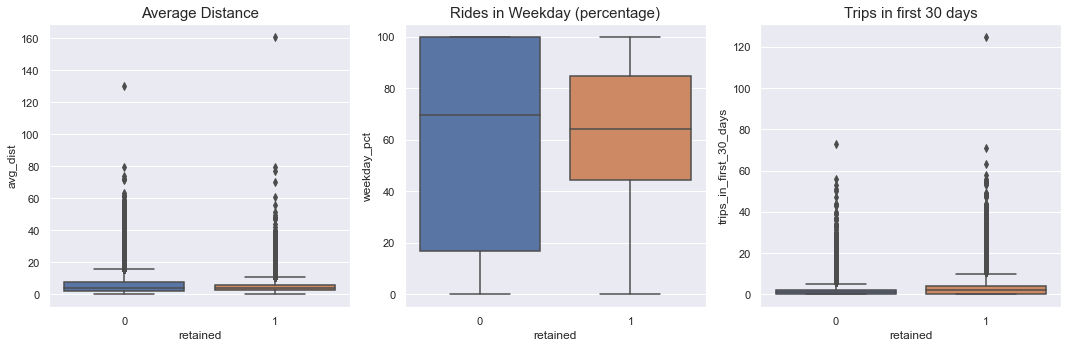

In [65]:
fig, (ax1,ax2, ax3) =plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(data=df, x='retained', y='avg_dist', ax=ax1)
ax1.set_title('Average Distance', fontsize=15)
sns.boxplot(data=df, x='retained', y='weekday_pct', ax=ax2)
ax2.set_title('Rides in Weekday (percentage)', fontsize=15)
sns.boxplot(data=df, x='retained', y='trips_in_first_30_days', ax=ax3)
ax3.set_title('Trips in first 30 days', fontsize=15)
fig.tight_layout()

Most influential factors are: Average distance, percentagae of rides in weekdays and no. of trips made in the first 30 days. To improve the rate of retention, the company might promote riders for these three factors by providing some incentives for the drivers who drives longer trips, who works more in weekdays and who makes more tripos in the first 30 days.